# Evaluation Notebook for Experiment 4: 
## Supervised Visual Odometry using Horizontal Imagers

In [31]:
from configuration import get_config
from evaluation import get_predicted_trajectory, get_actual_trajectory
from evaluation import get_predicted_poses, get_actual_poses

import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

%matplotlib inline 

## Qualitative Trajectory Evaluation

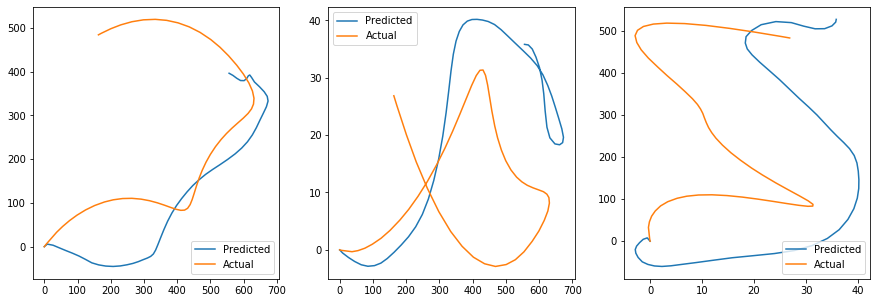

In [25]:
cfg = get_config()

# Get predicted and actual trajectories
predicted = get_predicted_trajectory(force_recalculate=False)
actual = get_actual_trajectory()

predicted_xs, predicted_ys, predicted_zs = predicted[:, 0], predicted[:, 1], predicted[:, 2]
actual_xs, actual_ys, actual_zs = actual[:, 0], actual[:, 1], actual[:, 2]

# Plot some trajectories
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(131)
ax.plot(predicted_xs*2, predicted_zs*1.5, label="Predicted")
ax.plot(actual_xs, actual_zs, label="Actual")
ax.legend()

ax = fig.add_subplot(132)
ax.plot(predicted_xs*2, predicted_ys*1, label="Predicted")
ax.plot(actual_xs, actual_ys, label="Actual")
ax.legend()

ax = fig.add_subplot(133)
ax.plot(predicted_ys, predicted_zs*2, label="Predicted")
ax.plot(actual_ys, actual_zs, label="Actual")
ax.legend()

plt.show()

## Absolute Position Error (Cumulative)


Average Cumulative Position Error (mm)
╒════════╤════════════════════╤════════════════════╤════════════════════╕
│ -      │ X                  │ Y                  │ Z                  │
├────────┼────────────────────┼────────────────────┼────────────────────┤
│ Mean   │ -174.5610661038795 │ 10.328747801510495 │ -150.1539784544901 │
├────────┼────────────────────┼────────────────────┼────────────────────┤
│ Median │ -217.7103838333589 │ 18.262801644377763 │ -139.4866132091679 │
╘════════╧════════════════════╧════════════════════╧════════════════════╛


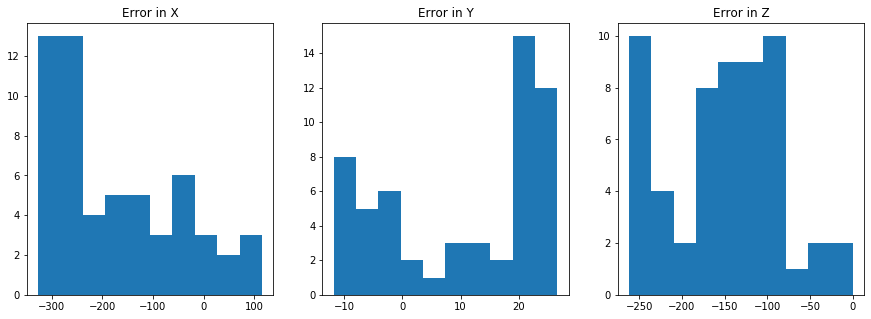

In [48]:
# Evaluate absolute position error

error_x = predicted_xs - actual_xs
error_y = predicted_ys - actual_ys
error_z = predicted_zs - actual_zs

table = [
    ["-", "X", "Y", "Z"],
    ["Mean", np.mean(error_x), np.mean(error_y), np.mean(error_z)],
    ["Median", np.median(error_x), np.median(error_y), np.median(error_z)],
]
print("")
print("Average Cumulative Position Error (mm)")
print(tabulate(table, tablefmt="fancy_grid"))

fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(131)
ax.set_title("Error in X")
_ = ax.hist(error_x)

ax = fig.add_subplot(132)
ax.set_title("Error in Y")
_ = ax.hist(error_y)

ax = fig.add_subplot(133)
ax.set_title("Error in Z")
_ = ax.hist(error_z)

## Relative Translational Error (Instantaneous Pose Estimates)

In [42]:
predicted = get_predicted_poses(force_recalculate=False)
actual = get_actual_poses()

px, py, pz = predicted[:, 0], predicted[:, 1], predicted[:, 2]
pRx, pRy, pRz = predicted[:, 3], predicted[:, 4], predicted[:, 5]
x, y, z = actual[:, 0], actual[:, 1], actual[:, 2]
Rx, Ry, Rz = actual[:, 3], actual[:, 4], actual[:, 5]


Relative Translational Error (mm)
╒════════╤════════════════════╤═════════════════════╤══════════════════════╕
│ -      │ X                  │ Y                   │ Z                    │
├────────┼────────────────────┼─────────────────────┼──────────────────────┤
│ Mean   │ 0.9186832063251681 │ -1.077963946087954  │ -0.41362740082114613 │
├────────┼────────────────────┼─────────────────────┼──────────────────────┤
│ Median │ 1.5513470227953718 │ -1.2303224332339442 │ 1.4911233335386658   │
╘════════╧════════════════════╧═════════════════════╧══════════════════════╛


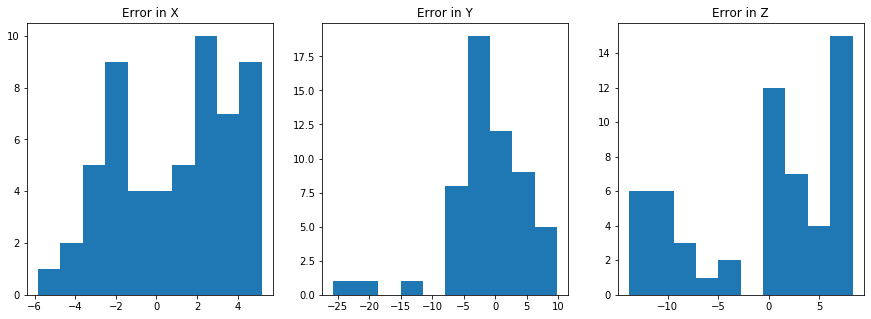

In [49]:
error_x = px - x
error_y = py - y
error_z = pz - z

table = [
    ["-", "X", "Y", "Z"],
    ["Mean", np.mean(error_x), np.mean(error_y), np.mean(error_z)],
    ["Median", np.median(error_x), np.median(error_y), np.median(error_z)],
]

print("")
print("Relative Translational Error (mm)")
print(tabulate(table, tablefmt="fancy_grid"))

fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(131)
ax.set_title("Error in X")
_ = ax.hist(error_x)

ax = fig.add_subplot(132)
ax.set_title("Error in Y")
_ = ax.hist(error_y)

ax = fig.add_subplot(133)
ax.set_title("Error in Z")
_ = ax.hist(error_z)

## Relative Rotational Error (Instantaneous)

In [ ]:
error_x = pRx - Rx
error_y = pRy - Ry
error_z = pRz - Rz

table = [
    ["-", "Rx", "Ry", "Rz"],
    ["Mean", np.mean(error_x), np.mean(error_y), np.mean(error_z)],
    ["Median", np.median(error_x), np.median(error_y), np.median(error_z)],
]


print("")
print("Average Relative Rotational Error (1/1000th Radian)")
print(tabulate(table, tablefmt="fancy_grid"))

fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(131)
ax.set_title("Error in Rx")
_ = ax.hist(error_x)

ax = fig.add_subplot(132)
ax.set_title("Error in Ry")
_ = ax.hist(error_y)

ax = fig.add_subplot(133)
ax.set_title("Error in Rz")
_ = ax.hist(error_z)


Average Relative Rotational Error (1/1000th Radian)
╒════════╤════════════════════╤═════════════════════╤═════════════════════╕
│ -      │ Rx                 │ Ry                  │ Rz                  │
├────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ Mean   │ 2.0547628492600194 │ 0.16005080363789492 │ -3.9246613638878984 │
├────────┼────────────────────┼─────────────────────┼─────────────────────┤
│ Median │ -3.458424452874251 │ -0.2715021171812606 │ -3.319096464108511  │
╘════════╧════════════════════╧═════════════════════╧═════════════════════╛
